## Task 2: Data Analysis

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [45]:
df = pd.read_csv("loan_data.csv")
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**Before we got into deep work in our dataset we neew to invastigate if there\`re Null values or not**


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


- As I mentioned before, the dataset contains Null dataset which means a missing entery, whichever the reason is, we will deal with this proplem later.

### prepare questions
**First of all note that: Loan_ID does\`t make any sence if we avoid/deleted it or not**

***Second the following questions have to discover to analyize insights***
- How many Male or Felmale accepted Loaan_Status?
- Question 2:Is the one who excepte him/her loan graduated or Not? And how many?
- For those who aren\`t graduate how many people do they depend on?
- Is there any graduated\`s poeple dependent? if so how many?
- How many graduated clients are self-employed ? invastigate their educations, genders, loan_status?
- Are they maried? and how many maried ones accepted Loan_Status?
- Which is the most area accepted to give load?
- How many male or female in this area? and their education, dependens and Self-Employed or not?
- How many LoanAmount of each male and felmale and related to thier education, marage, dependens and Credit_history?


In [4]:
# Question 1: How many Male or Felmale accepted Loaan_Status?
df[df["Loan_Status"] == "Y"]["Gender"].value_counts().to_frame()

,Gender
Male,339
Female,75


In [5]:
df[df["Loan_Status"] == "N"]["Gender"].value_counts().to_frame()

,Gender
Male,150
Female,37


In [8]:
# Question 2:Is the one who excepte him/her loan graduated or Not? And how many?
df[df["Loan_Status"] == "Y"]["Education"].value_counts().to_frame()
# there are 340 graduated and 82 not

,Education
Graduate,340
Not Graduate,82


In [16]:
# For those who aren`t graduate how many people do they depend on?
df[(df["Loan_Status"] == "Y") & (df["Education"] =="Not Graduate")]["Dependents"].value_counts().to_frame()

# most of them are independents and a few of them are dependents on 3 or more.
# they all accepted to take loans

,Dependents
0,42
2,17
1,14
3+,8


In [15]:
# Is there any graduated`s poeple dependent? if so how many?
df[(df["Loan_Status"] == "Y") & (df["Education"] =="Graduate")]["Dependents"].value_counts().to_frame()

# now a most of them are indeoendent as 0 indicated, some of them depends on 2 poepole..
# and 52 depends on 1 person last things is 25 of the clients depends on more than or equal to 3

,Dependents
0,196
2,59
1,52
3+,25


In [19]:
# How many graduated clients are self-employed ? invastigate their educations, genders, loan_status?
df[(df["Loan_Status"] == "Y") & (df["Education"] =="Graduate")]["Self_Employed"].value_counts().to_frame()

# most of them are not employed and 46 are epmployed with others.

,Self_Employed
No,276
Yes,46


In [22]:
# Gender
df[(df["Loan_Status"] == "Y") & (df["Education"] =="Graduate")]["Gender"].value_counts().to_frame()

,Gender
Male,271
Female,61


In [24]:
# Are they maried? and how many maried ones accepted Loan_Status?
df[(df["Loan_Status"] == "Y") & (df["Education"] =="Graduate")]["Married"].value_counts().to_frame()

# 231 mearried clients and accepted th loan

,Married
Yes,231
No,106


In [32]:
# Which is the most area accepted to give load?
df[df["Loan_Status"] == "Y"]["Property_Area"].value_counts().to_frame()

# Semiurban is the most area accepte their loan

,Property_Area
Semiurban,179
Urban,133
Rural,110


In [33]:
# How many male or female in this area? and their education, dependens and Self-Employed or not?
df[df["Property_Area"] == "Semiurban"]["Gender"].value_counts().to_frame()

# 172 males and 55 females

,Gender
Male,172
Female,55


In [34]:
df[df["Property_Area"] == "Semiurban"]["Education"].value_counts().to_frame()


,Education
Graduate,187
Not Graduate,46


In [38]:
df[df["Property_Area"] == "Semiurban"]["Self_Employed"].value_counts().to_frame()


,Self_Employed
No,191
Yes,32


In [68]:
# How many LoanAmount of each male and felmale and related to thier education, marage, dependens and/or Credit_history?
df[df["Property_Area"] == "Semiurban"][["Gender","LoanAmount"]]

,Gender,LoanAmount
7,Male,158.0
9,Male,349.0
22,Male,116.0
24,Male,151.0
25,Male,191.0
...,...,...
592,NaN,292.0
597,Male,88.0
604,Female,496.0
606,Male,173.0


In [66]:
df[(df["Property_Area"] == "Semiurban") & (df["Gender"] == ("Male" or "Female"))]["Education"].value_counts().to_frame()

,Education
Graduate,136
Not Graduate,36


In [72]:
df[(df["Property_Area"] == "Semiurban") & (df["Gender"] == ("Male" or "Female"))]["Married"].value_counts().to_frame()

,Married
Yes,127
No,44


In [73]:
df[(df["Property_Area"] == "Semiurban") & (df["Gender"] == ("Male" or "Female"))]["Dependents"].value_counts().to_frame()

,Dependents
0,88
2,32
1,28
3+,19


In [76]:
df[(df["Property_Area"] == "Semiurban") & (df["Gender"] == ("Male" or "Female"))]["Credit_History"].value_counts().to_frame()

,Credit_History
1.0,141
0.0,20


## In sum (summries the analysis above we\`ve got.)

* There are 150 Males and Females are not accepted loan.
* 340 graduted and 82 not graduated clients are accptable their loan.
* For who are accepted loan and educated, 196 of them independents, 59 depending on 2, 52 depending on 1 and 25 clients depending on 3 or more respectively.
* While who accepted loan and not educated, 42 independns, 17 depending on 2, 14 depending on 1 and 8 clients depending on 3 or more respectively. (whenever they depending on the rule must apply!)
* All acceptable thier loan: 340 educated 276 of them employed while the rest 46 are self-educated, they including 271 Males and 61 Females, and 231 clients are married while the other (106) are not (i.e still single).
* the most common are that accepted loan to is 'Semiurban' which contains 172 Males and 55 Females, most of them are educated, self-employed, married, dependents or independents and most of them are\`t at all (i.e the reverse of them)

**Remember datasets contains missing (Nan) values**

***Analysis not finifhed yet snice there are columns not touched yet, and some analysis coding are still not provided***

## Data Visualizations

### Explore the correlation between features

In [56]:
# recall that
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


* As we can see LoanAmount correlated by ApplicantIncome by 0.570909 strong correlation!
- Let\`s visualize them...

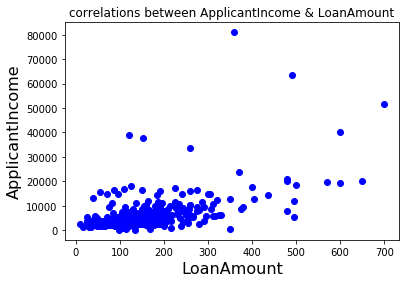

In [71]:
plt.plot(LS["LoanAmount"], LS["ApplicantIncome"], "bo")
plt.xlabel("LoanAmount", fontsize=16)
plt.ylabel("ApplicantIncome", fontsize=16)
plt.title("correlations between ApplicantIncome & LoanAmount")
plt.show()

**Is there any relation between Loan_Status and other features!?**

***Let\`s see but first since it\`s Loan_Status dtype is object let\`s convert it into binary***

In [22]:
# convert Loan_status binary
def convert_string(X):
    if X =="Y":
        return 1
    elif X == "N":
        return 0

LS = df.copy()
LS["loan_satus_converted"] = df["Loan_Status"].apply(convert_string)

In [72]:
# loan_satus_converted had correlated with Credit_History!
LS.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,loan_satus_converted
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
loan_satus_converted,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


**We see here there is strong relation between <span style="color:blue"> 'Credit_History'</span> and <span style="color:blue"> 'loan_satus_converted'</span> by 0.561678**

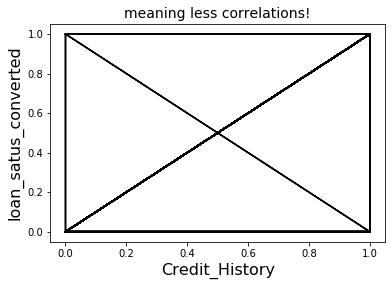

In [69]:
plt.plot(LS["Credit_History"], LS["loan_satus_converted"], "k-")
plt.xlabel("Credit_History", fontsize=16)
plt.ylabel("loan_satus_converted", fontsize=16)
plt.title("meaning less correlations!", fontsize=14)
plt.show()

**the shape seem to be meaningless, that bacuse we converted <span style="color:orange">Loan_Status column</span> into binary <span style="color:red">0 </span>or <span style="color:red">1 </span>so, the correlation not quite clear as we saw in previous table. <span style="color:green">It is not necessary when we saw a strong corrleation between two features looked like or (seem to be) real coorelation!</span>**

In [60]:
# Credit_History is also binary so correlation between Loan_Status is possible numerically.
df["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

## Creating hypothesis testing

**<span style="color:orange">Loan_Amount_Term</span>**

A loan term is the duration of the loan until it's paid off, such as 60 months for an auto loan or 30 years for a mortgage. You'll pay more interest overall on a long-term loan, but your payments will likely be less because the principal balance you borrowed is spread out over more months.

In [17]:
# create alternative hypothises: H1
df[df["Married"] == "Yes" ]["Loan_Amount_Term"].mean(), df[df["Married"] == "No" ]["Loan_Amount_Term"].mean()

(336.987146529563, 351.11538461538464)

**Alternative hypothesis says that married clients will have duration of loan paid off differs (i.e less than) married clients by <span style="color:blue">-14.128238085821636</span>**

In [51]:
df.shape

(614, 13)

In [59]:
total_difference = []
# iterate 10000 times
for _ in range(10000):
    # make sample of size (614, ) 10,000 times woth replacements
    samples = df.sample(df.shape[0], replace=True)
    # with married yes
    married = samples[samples["Married"] == "Yes" ]["Loan_Amount_Term"].mean()
    # not married
    not_married = samples[samples["Married"] == "No" ]["Loan_Amount_Term"].mean()
    # append the difference
    total_difference.append(married - not_married)

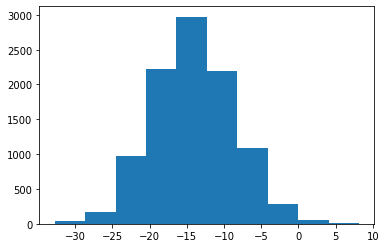

In [58]:
# smaple distribution
plt.hist(total_difference)
plt.show()

**Extract Null hypothesis, before that let\`s rescale tha normal distribution to standard normal distribution, (re-scaled by z-score)**

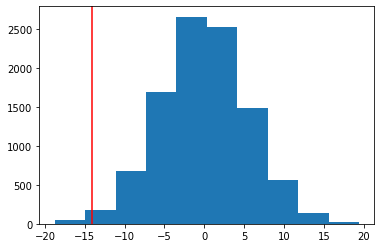

In [57]:
# convert that kist into array
f = np.array(total_difference)
# make a normal distribution with mean = 0 and standard deviation = 1
null = np.random.normal(0, f.std(), f.size )
# display that distribution
plt.hist(null)
plt.axvline(f.mean(), color="r")
plt.show()

**We need to checkout that if <span style="color:red"> p-value < critical </span> value to reject null hyopthiese or not**

In [ ]:
# p-value ?